(8296, 2121)
             precision    recall  f1-score   support

        1.0       0.38      1.00      0.55        52
        2.0       1.00      0.04      0.08        49
        3.0       1.00      0.22      0.37        49

avg / total       0.78      0.43      0.34       150



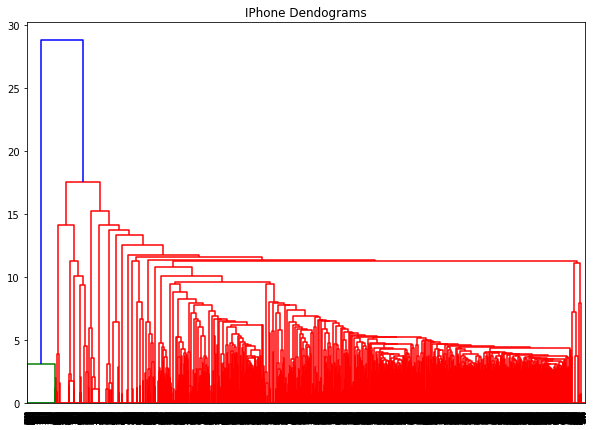

In [1]:
# how to form the clusters in the end?
import matplotlib.pyplot as plt 
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc
import pandas as pd  
%matplotlib inline
import numpy as np 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import metrics
from nltk.corpus import stopwords
from nltk.cluster import KMeansClusterer,cosine_distance
from scipy.cluster.hierarchy import ward, dendrogram
#loading the CSV file into the dataframe
data = pd.read_csv('Downloads/iPhoneXS_twitter_eda.csv')  
tfidf_vect = TfidfVectorizer(stop_words="english",\
                             min_df=5) 
dtm= tfidf_vect.fit_transform(data["text"])
print(dtm.shape)

#initialising the cluster where the number of clusters is set to 3 ,distance used is euclidean 
#and linkage used is ward.
clusterer = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')  

#plotting the dendrogram for the clusters
plt.figure(figsize=(10, 7))  
plt.title("IPhone Dendograms")  
dend = shc.dendrogram(shc.linkage(dtm.toarray(), method='ward')) 
clusterer.fit(dtm.toarray()) 
data["cluster"]=clusterer.labels_
pd.crosstab( index=data.cluster[0:150], columns=data.Labels[0:150])

#defining the cluster dictionary
cluster_dict={0:1,1:3,2:2}

# Assign true class to cluster
predicted_clusters=[cluster_dict[i] for i in clusterer.labels_[0:150]]

# generating the metrics report
print(metrics.classification_report(data.Labels[0:150], predicted_clusters))